# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project 2: Building a Student Intervention System

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

This is a classification problem because we need to classify students into two categories, those who need intervention and those who don't. The classification is represented with a discrete class label such true/false, binary value 0/1, and not with a continuous real value.

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [51]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"

Student data read successfully!


### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [52]:
# TODO: Calculate number of students
n_students = student_data.index.size

# TODO: Calculate number of features
n_features = student_data.columns.size - 1

# TODO: Calculate passing students
n_passed = student_data[student_data['passed'] == 'yes'].index.size

# TODO: Calculate failing students
n_failed = student_data[student_data['passed'] == 'no'].index.size

# TODO: Calculate graduation rate
from __future__ import division
grad_rate = n_passed / n_students * 100

# Print the results
print "Total number of students: {}".format(n_students)
print "Number of features: {}".format(n_features)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

Total number of students: 395
Number of features: 30
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%


## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [53]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
print "\nFeature values:"
print X_all.head()

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob   ...    higher internet  romantic  famrel  freetime goout Dalc Walc health absences
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   ...       yes       no        no       4         3     4    1    1      3        6
1     GP   F   17       U     GT3       T     1     1  at_home     other   ...       yes      yes        no       5         3     3    1    1      3        4
2     GP   F   15       U     LE3       T     1     1  at_home     other   ...       yes      yes        no       4         3     2    2    3      3       10
3

### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [54]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

<b>Review</b><p>
<i>Pro Tip: Data assessment:
When dealing with the new data set it is good practice to assess its specific characteristics and implement the cross validation technique tailored on those very characteristics, in our case there are two main elements:

Our dataset is small.
Our dataset is slightly unbalanced. (There are more passing students than on passing students)
We could take advantage of K-fold cross validation to exploit small data sets. Even though in this case it might not be necessary, should we have to deal with heavily unbalance datasets, we could address the unbalanced nature of our data set using Stratified K-Fold and Stratified Shuffle Split Cross validation, as stratification is preserving the preserving the percentage of samples for each class.
http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html
http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedKFold.html
As for the initial train test split you can obtain stratification by simply using stratify = y_all:

In [55]:
# TODO: Import any additional functionality you may need here
from sklearn.cross_validation import train_test_split

# TODO: Set the number of training points
num_train = 300

# Set the number of testing points
num_test = X_all.shape[0] - num_train

# TODO: Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=123)

# Review
#X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, stratify = y_all, test_size=95, random_state=42)    

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 300 samples.
Testing set has 95 samples.


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. For each model chosen*
- Describe one real-world application in industry where the model can be applied. *(You may need to do a small bit of research for this — give references!)* 
- What are the strengths of the model; when does it perform well? 
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

<ol>
<li>Logistic Regression (LR)</li>
<p>
<ul>
<li>Application: LR can be used in weather forecasting as desribed here: <a href="http://journals.ametsoc.org/doi/full/10.1175/2009MWR3126.1">American Meteorological Society</a></li>
<li>Pros: The model is computationally efficient in both training and prediction stages. LR performs well on linearly separable data.</li>
<li>Cons: LR may not perform well when feature space is too large. It requires transformation for non-standardized features.<br>
Reference: <a href="https://www.amazon.com/gp/product/1783555130/ref=s9_psimh_gw_g14_i6_r?ie=UTF8&fpl=fresh&pf_rd_m=ATVPDKIKX0DER&pf_rd_s=&pf_rd_r=EHC7HB7BCJC0RSJGQ9NA&pf_rd_t=36701&pf_rd_p=6aad23bd-3035-4a40-b691-0eefb1a18396&pf_rd_i=desktop">Python Machine Learning</a></li>
<li>Reason: Since one of the requirements is to use the least amount of computational cost, and given LR's efficiency, the model could be a good candidate. Heat map below shows a strong linear relationship between passed status and a number of failures, which suggest that a linear model may suffice.
</li>
</ul>

<p><li>K-Nearest Neighbors (KNN)</li>
<p>
<ul>
<li>Application: KNN is used in Bioinformatics as described here: <a href="http://www.ncbi.nlm.nih.gov/pubmed/21827427">Protein-Protein Interaction</a></li>
<li>Pros: The model makes no assumptions about the underlying data. KNN allows to make predictions without any model training, it immediately adapts as new training data is collected. It is insensitive to outliers in the data.</li>
<li>Cons: KNN could be computationally expensive during prediction stage. The complexity grows linearly with the number of samples. The model must keep its data in memory (or database). KNN's distance parameter must be chosen carefully </li>
<li>Reason: At this point in the process, it is not entirely clear that a linear model like Logistic Regression will meet our needs. Because KNN doesn't assume any linearity in the data, it may generalize better.
</li>
</ul>

<p><li>Random Forest (RF)</li>
<p>
<ul>
<li>Applications: One of the uses of RF is in medicine, for example to find clusters of patients based on tissue marker data. Reference: <a href="http://www.nature.com/modpathol/journal/v18/n4/full/3800322a.html">Modern Pathology</a></li>
<li>Pros: The model is efficient on large data sets. It doesn't over-fit easily. Robust to noise. Easy in use as it doesn't require much parameter tuning. Reference: <a href="http://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm">Random Forests</a></li>
<li>Cons: Large number of decision trees may make the model slow during training and prediction stages</li>
<li>Reason: RF can learn more complex, non-linear relationships than a model like LR. If the dataset is large or noisy, RF will likely provide good prediction performance</li>
</ul>
</ol>

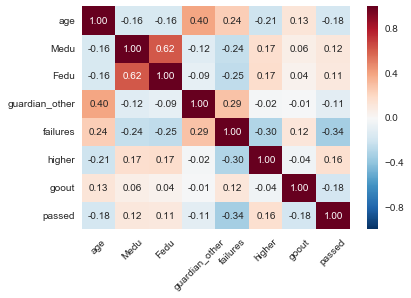

In [56]:
%matplotlib inline
X = X_all
X['passed'] = y_all.replace(['yes','no'],[1,0])
corr = X.corr()
corr_cols = np.abs(corr['passed']) > .10
corr = corr.loc[corr_cols,corr_cols]

import seaborn as sns
sns.heatmap(corr, annot=True, fmt='.2f')
xt = plt.xticks(rotation=45)
yt = plt.yticks(rotation=0)

### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [57]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    return f1_score(target, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print "F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [58]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# TODO: Initialize the three models
clf_A = LogisticRegression(random_state=123)
clf_B = KNeighborsClassifier()
clf_C = RandomForestClassifier(random_state=123)

# TODO: Set up the training set sizes
X_train_100 = X_train[:100]
y_train_100 = y_train[:100]

X_train_200 = X_train[:200]
y_train_200 = y_train[:200]

X_train_300 = X_train[:300]
y_train_300 = y_train[:300]

# Reviewer's suggestion
# Optional: You could use a loop to go through the algorithms:
#for clf in [clf_A, clf_B, clf_C]:
#    print "\n{}: \n".format(clf.__class__.__name__)
#    for n in [100, 200, 300]:
#        train_predict(clf, X_train[:n], y_train[:n], X_test, y_test)

# TODO: Execute the 'train_predict' function for each classifier and each training set size
train_predict(clf_A, X_train_100, y_train_100, X_test, y_test)
train_predict(clf_A, X_train_200, y_train_200, X_test, y_test)
train_predict(clf_A, X_train_300, y_train_300, X_test, y_test)

train_predict(clf_B, X_train_100, y_train_100, X_test, y_test)
train_predict(clf_B, X_train_200, y_train_200, X_test, y_test)
train_predict(clf_B, X_train_300, y_train_300, X_test, y_test)

train_predict(clf_C, X_train_100, y_train_100, X_test, y_test)
train_predict(clf_C, X_train_200, y_train_200, X_test, y_test)
train_predict(clf_C, X_train_300, y_train_300, X_test, y_test)

Training a LogisticRegression using a training set size of 100. . .
Trained model in 0.0021 seconds
Made predictions in 0.0002 seconds.
F1 score for training set: 0.8310.
Made predictions in 0.0003 seconds.
F1 score for test set: 0.8201.
Training a LogisticRegression using a training set size of 200. . .
Trained model in 0.0029 seconds
Made predictions in 0.0002 seconds.
F1 score for training set: 0.8188.
Made predictions in 0.0002 seconds.
F1 score for test set: 0.8472.
Training a LogisticRegression using a training set size of 300. . .
Trained model in 0.0039 seconds
Made predictions in 0.0003 seconds.
F1 score for training set: 0.8326.
Made predictions in 0.0002 seconds.
F1 score for test set: 0.8630.
Training a KNeighborsClassifier using a training set size of 100. . .
Trained model in 0.0006 seconds
Made predictions in 0.0013 seconds.
F1 score for training set: 0.7808.
Made predictions in 0.0011 seconds.
F1 score for test set: 0.8414.
Training a KNeighborsClassifier using a traini

### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

** Classifer 1 - LogisticRegression  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               | 0.0019                  | 0.0001                 | 0.8310           | 0.8201          |
| 200               | 0.0026                  | 0.0001                 | 0.8188           | 0.8472          |
| 300               | 0.0037                  | 0.0001                 | 0.8326           | 0.8630          |

** Classifer 2 - KNeighborsClassifier 

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               | 0.0005                  | 0.0011                 | 0.7808           | 0.8414          |
| 200               | 0.0006                  | 0.0016                 | 0.8132           | 0.8132          |
| 300               | 0.0007                  | 0.0022                 | 0.8592           | 0.8591          |

** Classifer 3 - RandomForestClassifier

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               | 0.0235                  | 0.0010                 | 0.9846           | 0.8194          |
| 200               | 0.0252                  | 0.0010                 | 0.9921           | 0.7820          |
| 300               | 0.0257                  | 0.0011                 | 0.9949           | 0.8299          |

## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Choosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

Based on the results above, the best model is Logistic Regression (LR). Its two significant advantages, when combined, are prediction time and higher test score.
<ul>
<li>Efficiency: LR's training and prediction time is approximately ten times better than the one of Random Forest. On the largest data set (300 samples), the prediction time is 20 times better than KNN's.</li> 
<li>Test score: Although, all models perform similarly well, LR has a slight advantage with larger datasets. Moreover, its prediction performance is improved with more data and the trend shows a steady increase in accuracy. The prediction ability of other models fluctuates with varying sample sizes</li>
<li>Scalability: With extremely large data sets LR may perform poorly because it requires complete data set to generate the model, and whose computational efficiency grows linearly with the amount of data. In such scenario, Stochastic Gradient Descent (SGDC) would perform better while still fitting Logistic Regression model. With SGDC, existing data can be processed in batches, and new data can be fitted as it arrives, thus minimizing computation time and using minimal memory resources</li>
</ul>

<p><b>Review</b><p><i>
Tip: Scalability, developing a proactive attitude<br>
An interesting question you might address to further improve your answer, and show some business-oriented proactivity by anticipating the customer’s needs, regards the scalability of your chosen algorithm: What would happen if you had to classify thousands or hundreds of thousands of students? What would happen with training time and with prediction time? Would you still choose the same algorithm? (Please note that this is relevant as not every algorithm scales linearly, some might scale exponentially, which means that the computational costs might grow exponentially with size. This is not an issue as for now but it would be if we were considering a much bigger number of students) (<a href="https://github.com/jeff1evesque/machine-learning/wiki/Algorithm:-Big-O-Notation">Algorithm Big-O</a>)

### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

In order to make a prediction whether a student will pass a final exam, the model needs to learn a set of rules from the records of past students. A single record in the data should describe various characteristics of a student such as a number of past class failures, time management habits, whether the student passed the final exam, etc.
<p>
During training stage, the model assigns weights to specific characteristics (aka features). The weight signifies how much a specific feature affects the positive outcome, or a likelihood of a student passing the final exam.
Once the training stage is complete, the model will have created a rule set, represented by the weights, to make inferences about future students. At this point, existing data can be discarded, and the model can be deployed in an application.
<p>
At the heart of logistic function is odds ratio. The ratio, or weight, signifies the odds in favor of a particular event. The combination of odds/weights with features of a sample produces a value that is further transoformed into a probability of a positive outcome, i.e., likelihood of a student passing the exam. To convert that probability into a true statement, the function compares the value against a threshold, for example 0.5 (probability of 50%). If the value is greater than or equal to threshold, the function declares positive outcome, otherwise negative (the student will fail).
<p>
A person in charge that wants to know which students need support before they drop out of school, would run the application against current student records. The application queries the model and returns the prediction (true - will pass, false - will not pass). Based on the prediction, the person then takes the necessary steps to help those students graduate.

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.gridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

In [59]:
# TODO: Import 'GridSearchCV' and 'make_scorer'
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

# TODO: Initialize the classifier
clf = LogisticRegression(random_state=123)

# TODO: Create the parameters list you wish to tune
parameters = {'C':[0.01, 0.1, 1, 10], 'penalty':['l1','l2']}

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score, pos_label='yes')

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(estimator=clf, param_grid=parameters, scoring=f1_scorer, cv=10)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_

# Report the final F1 score for training and testing after parameter tuning
print "Best estimator parameters: {:s}".format(grid_obj.best_params_)
print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test))

Best estimator parameters: {'penalty': 'l1', 'C': 0.1}
Made predictions in 0.0002 seconds.
Tuned model has a training F1 score of 0.8069.
Made predictions in 0.0002 seconds.
Tuned model has a testing F1 score of 0.8846.


### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

The final training and testing scores are 0.8069 and 0.8846 respectively. The testing score has improved by 1%!

<p><b>Review</b><p>
<i>Pro Tip:<br>
We can use a stratified shuffle split data-split which preserves the percentage of samples for each class and combines it with cross validation. This could be extremely useful when the dataset is strongly imbalanced towards one of the two target labels.
<p>
<a href="http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html">Stratified Shuffle Split</a><p>
In this example a support vector classifier is used, any other classifier would do, please remind to change the parameters adapting them to the specific classifier you intend to deploy.

In [60]:
from sklearn.grid_search import GridSearchCV 
from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer

f1_scorer = make_scorer(f1_score, pos_label="yes")
parameters = { 'C' : [ 0.1, 1, 10, 100, 1000 ], 'gamma' : [ 0.0001, 0.001, 0.1, 10, 100 ] } # Some SVC parameters

ssscv = StratifiedShuffleSplit( y_train, n_iter=10, test_size=0.1) # 1. Let's build a stratified shuffle object

grid = GridSearchCV( SVC(), parameters, cv = ssscv , scoring=f1_scorer) # 2. Let's now we pass the object and the parameters to grid search
grid.fit( X_train, y_train ) # 3. Let's fit it

best = grid.best_estimator_ # 4. Let's reteieve the best estimator found
y_pred = best.predict( X_test ) # 5. Let's make predictions!

print "F1 score: {}".format( f1_score( y_test, y_pred, pos_label = 'yes' ))
print "Best params: {}".format( grid.best_params_ )

F1 score: 0.844155844156
Best params: {'C': 10, 'gamma': 0.1}


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

# References
<ul>
<li><a href="http://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm">Random Forests</a></li>
<li><a href="https://saravananthirumuruganathan.wordpress.com/2010/05/17/a-detailed-introduction-to-k-nearest-neighbor-knn-algorithm/">K-Nearest Neighbor</a></li>
<li><a href="https://www.amazon.com/gp/product/1783555130/ref=s9_psimh_gw_g14_i6_r?ie=UTF8&fpl=fresh&pf_rd_m=ATVPDKIKX0DER&pf_rd_s=&pf_rd_r=EHC7HB7BCJC0RSJGQ9NA&pf_rd_t=36701&pf_rd_p=6aad23bd-3035-4a40-b691-0eefb1a18396&pf_rd_i=desktop">Python Machine Learning</a></li>
<li><a href="http://journals.ametsoc.org/doi/full/10.1175/2009MWR3126.1">American Meteorological Society</a></li>
<li><a href="http://www.ncbi.nlm.nih.gov/pubmed/21827427">Protein-Protein Interaction</a></li>
<li><a href="http://www.nature.com/modpathol/journal/v18/n4/full/3800322a.html">Modern Pathology</a></li>
<li><a href="http://sebastianraschka.com/blog/2015/why-python.html">Heat Maps in R</a></li>
<li><a href="http://www.kdnuggets.com/2016/04/deep-learning-vs-svm-random-forest.html">When Does Deep Learning Work Better Than SVMs or Random Forests?</a></li>
</ul>
